# Problem 1 

During the lecture you worked with pipelines in SciKit-Learn to perform feature transformation before classification/regression using a pipeline. In this problem, you will look at another scaling method in a 2D regression context.

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:
Sklearn Models (no scaling): Print Train and Test MSE
- Linear Regression (input degree 8 features)
- SVR, C = 1000
- KNN, K = 4
- Random Forest, 100 estimators of max depth 10  

Sklearn Pipeline (scaling + model): Print Train and Test MSE
- Linear Regression (input degree 8 features)
- SVR, C = 1000
- KNN, K = 4
- Random Forest, 100 estimators of max depth 10  

Plots
- 1x5 subplot showing model predictions on unscaled features, next to ground truth
- 1x5 subplot showing pipeline predictions with features scaled, next to ground truth

Questions
- Respond to the prompts at the end

In [30]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot(X, y, title=""):
    plt.scatter(X[:,0],X[:,1],c=y,cmap="jet")
    plt.colorbar(orientation="horizontal")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title(title)

## Load the data

Complete the loading process below by inputting the path to the data file "w6-p1-data.npy"

Training data is in `X_train` and `y_train`.
Testing data is in `X_test` and `y_test`.

<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
C:\Users\barat\AppData\Local\Temp\ipykernel_2244\3237680281.py:3: SyntaxWarning: invalid escape sequence '\w'
  data = np.load("data\w6-p1-data.npy")


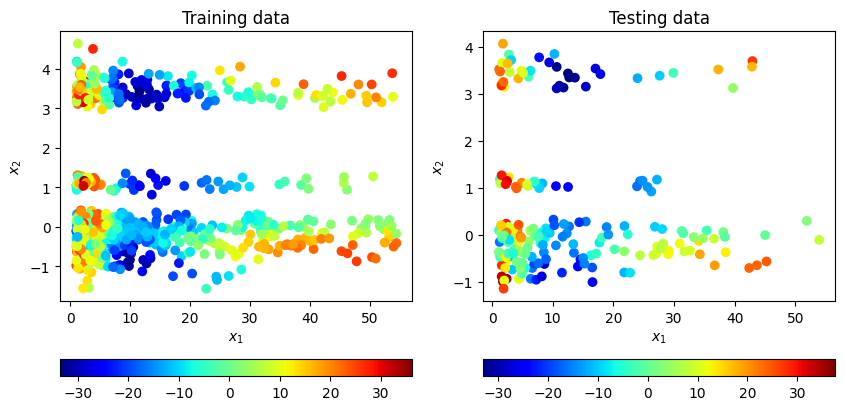

In [31]:
# YOUR CODE GOES HERE
# Define path
data = np.load("data\w6-p1-data.npy")
X, y = data[:,:2], data[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=int(0.8*len(y)),random_state=0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot(X_train, y_train, "Training data")
plt.subplot(1,2,2)
plot(X_test, y_test, "Testing data")
plt.show()

## Models (no input scaling)
Fit 4 models to the training data:
- `LinearRegression()`. This should be a pipeline whose first step is `PolynomialFeatures()` with degree 7.
- `SVR()` with C = 1000 and "rbf" kernel
- `KNeighborsRegressor()` using 4 nearest neighbors
- `RandomForestRegressor()` with 100 estimators of max depth 10

Print the Train and Test MSE for each

In [32]:
model_names = ["LSR", "SVR", "KNN", "RF"]

# YOUR CODE GOES HERE
LR_ = Pipeline([("poly", PolynomialFeatures(degree = 7)), ("LSR", LinearRegression())])
SVR_ = Pipeline([("SVR", SVR(C = 1000, kernel = 'rbf'))])
KNN_ = Pipeline([("KNN", KNeighborsRegressor(n_neighbors = 4))])
RF_ = Pipeline([("RF", RandomForestRegressor(n_estimators = 100, max_depth = 10))])

LR_.fit(X_train, y_train)
SVR_.fit(X_train, y_train)
KNN_.fit(X_train, y_train)
RF_.fit(X_train, y_train)

mse_train_LR_ = mean_squared_error(y_train, LR_.predict(X_train))
mse_train_SVR_ = mean_squared_error(y_train, SVR_.predict(X_train))
mse_train_KNN_ = mean_squared_error(y_train, KNN_.predict(X_train))
mse_train_RF_ = mean_squared_error(y_train, RF_.predict(X_train))

mse_test_LR_ = mean_squared_error(y_test, LR_.predict(X_test))
mse_test_SVR_ = mean_squared_error(y_test, SVR_.predict(X_test))
mse_test_KNN_ = mean_squared_error(y_test, KNN_.predict(X_test))
mse_test_RF_ = mean_squared_error(y_test, RF_.predict(X_test))

print("Train MSE for Linear Regression Model: ", mse_train_LR_)
print("Test MSE for Linear Regression Model: ", mse_test_LR_)

print("\nTrain MSE for SVR Model: ", mse_train_SVR_)
print("Test MSE for SVR Model: ", mse_test_SVR_)

print("\nTrain MSE for KNN Model: ", mse_train_KNN_)
print("Test MSE for KNN Model: ", mse_test_KNN_)

print("\nTrain MSE for RF Model: ", mse_train_RF_)
print("Test MSE for RF Model: ", mse_test_RF_)


Train MSE for Linear Regression Model:  50.866389902820316
Test MSE for Linear Regression Model:  57.28650739095314

Train MSE for SVR Model:  82.04352603565992
Test MSE for SVR Model:  98.63319719407623

Train MSE for KNN Model:  26.856498566141628
Test MSE for KNN Model:  47.63617328402055

Train MSE for RF Model:  5.874835115214487
Test MSE for RF Model:  25.26604134921764


## Visualizing the predictions
Plot the predictions of each method on the testing data in a 1x5 subplot structure, with the ground truth values as the leftmost subplot.

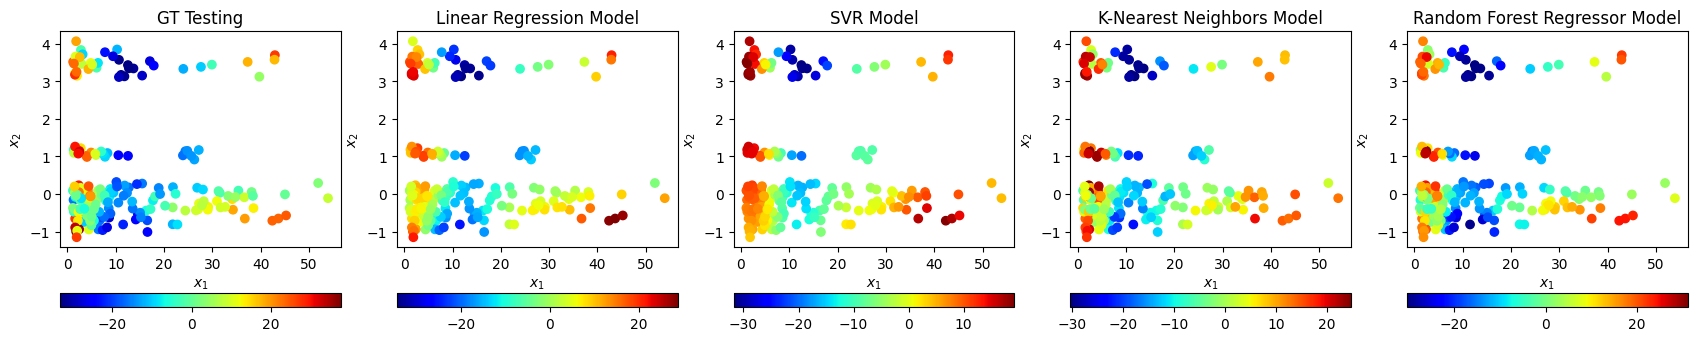

In [33]:
plt.figure(figsize=(21,4))
plt.subplot(1,5,1)
plot(X_test, y_test, "GT Testing")

# YOUR CODE GOES HERE
plt.subplot(1,5,2)
plot(X_test, LR_.predict(X_test), "Linear Regression Model")

plt.subplot(1,5,3)
plot(X_test, SVR_.predict(X_test), "SVR Model")

plt.subplot(1,5,4)
plot(X_test, KNN_.predict(X_test), "K-Nearest Neighbors Model")

plt.subplot(1,5,5)
plot(X_test, RF_.predict(X_test), "Random Forest Regressor Model")

plt.show()

## Quantile Scaling

A `QuantileTransformer()` can transform the input data in a way that attempts to match a given distribution (uniform distribution by default).  
- Create a quantile scaler with `n_quantiles = 800`.
- Then, create a pipeline for each of the 4 types of models used earlier
- Fit each pipeline to the training data, and again print the train and test MSE

In [34]:
pipeline_names = ["LSR, scaled", "SVR, scaled", "KNN, scaled", "RF, scaled"]

# YOUR CODE GOES HERE
QF = QuantileTransformer(n_quantiles = 800)

LR_scaled_ = Pipeline([('scaler', QF), ("poly", PolynomialFeatures(degree = 7)), ("LSR, scaled", LinearRegression())])
SVR_scaled_ = Pipeline([('scaler', QF), ("SVR, scaled", SVR(C = 1000, kernel = 'rbf'))])
KNN_scaled_ = Pipeline([('scaler', QF), ("KNN, scaled", KNeighborsRegressor(n_neighbors = 4))])
RF_scaled_ = Pipeline([('scaler', QF), ("RF, scaled", RandomForestRegressor(n_estimators = 100, max_depth = 10))])

LR_scaled_.fit(X_train, y_train)
SVR_scaled_.fit(X_train, y_train)
KNN_scaled_.fit(X_train, y_train)
RF_scaled_.fit(X_train, y_train)

mse_train_LR_scaled_ = mean_squared_error(y_train, LR_scaled_.predict(X_train))
mse_train_SVR_scaled_ = mean_squared_error(y_train, SVR_scaled_.predict(X_train))
mse_train_KNN_scaled_ = mean_squared_error(y_train, KNN_scaled_.predict(X_train))
mse_train_RF_scaled_ = mean_squared_error(y_train, RF_scaled_.predict(X_train))

mse_test_LR_scaled_ = mean_squared_error(y_test, LR_scaled_.predict(X_test))
mse_test_SVR_scaled_ = mean_squared_error(y_test, SVR_scaled_.predict(X_test))
mse_test_KNN_scaled_ = mean_squared_error(y_test, KNN_scaled_.predict(X_test))
mse_test_RF_scaled_ = mean_squared_error(y_test, RF_scaled_.predict(X_test))

print("Train MSE for scaled Linear Regression Model: ", mse_train_LR_scaled_)
print("Test MSE for scaled Linear Regression Model: ", mse_test_LR_scaled_)

print("\nTrain MSE for scaled SVR Model: ", mse_train_SVR_scaled_)
print("Test MSE for scaled SVR Model: ", mse_test_SVR_scaled_)

print("\nTrain MSE for scaled KNN Model: ", mse_train_KNN_scaled_)
print("Test MSE for scaled KNN Model: ", mse_test_KNN_scaled_)

print("\nTrain MSE for scaled RF Model: ", mse_train_RF_scaled_)
print("Test MSE for scaled RF Model: ", mse_test_RF_scaled_)

Train MSE for scaled Linear Regression Model:  39.52893428670224
Test MSE for scaled Linear Regression Model:  43.20363492250541

Train MSE for scaled SVR Model:  41.03425800596035
Test MSE for scaled SVR Model:  43.017915737899095

Train MSE for scaled KNN Model:  19.687691313922564
Test MSE for scaled KNN Model:  36.397038931930005

Train MSE for scaled RF Model:  6.105820991617033
Test MSE for scaled RF Model:  25.546583759880477


## Visualization with scaled input
As before, plot the predictions of each *scaled* method on the testing data in a 1x5 subplot structure, with the ground truth values as the leftmost subplot.  

This time, for each plot, show the scaled data points instead of the original data. You can do this by calling `.transform()` on your quantile scaler. The scaled points should appear to follow a uniform distribution.

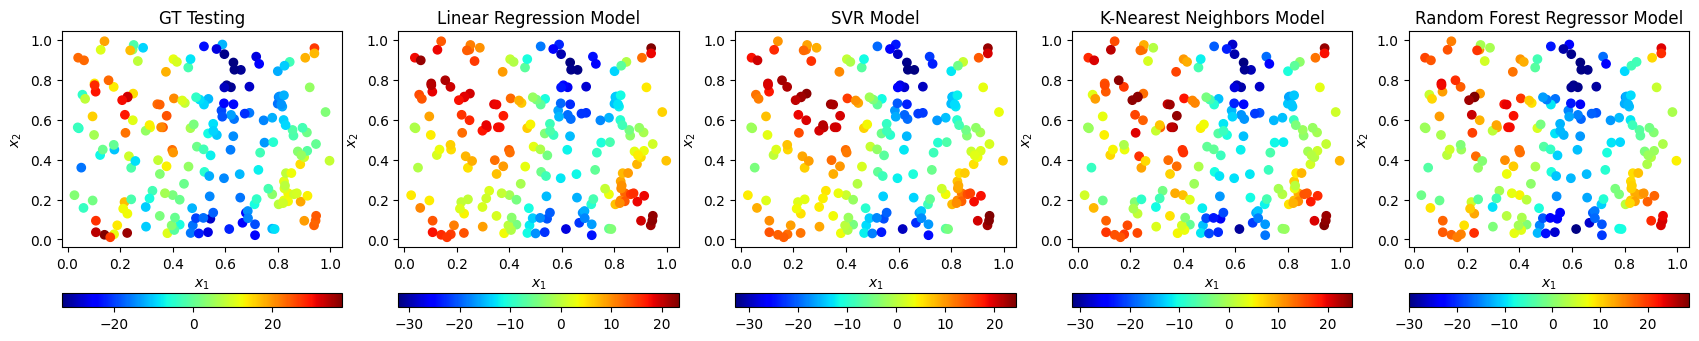

In [35]:
# YOUR CODE GOES HERE
plt.figure(figsize=(21,4))
plt.subplot(1,5,1)
plot(QF.transform(X_test), y_test, "GT Testing")

# YOUR CODE GOES HERE
plt.subplot(1,5,2)
plot(QF.transform(X_test), LR_scaled_.predict(X_test), "Linear Regression Model")

plt.subplot(1,5,3)
plot(QF.transform(X_test), SVR_scaled_.predict(X_test), "SVR Model")

plt.subplot(1,5,4)
plot(QF.transform(X_test), KNN_scaled_.predict(X_test), "K-Nearest Neighbors Model")

plt.subplot(1,5,5)
plot(QF.transform(X_test), RF_scaled_.predict(X_test), "Random Forest Regressor Model")

plt.show()

## Questions

1. Without transforming the input data, which model performed the best on test data? What about after scaling?  


2. For each method, say whether scaling the input improved or worsened, how extreme the change was, and why you think this is.  


## Answers
1. Before scaling the data, the Random Forest Regressor model performed the best on the test data, with a test MSE of 25.3. After scaling as well, the Random Forest Regressor model performed the best on the test data.
2. The test MSE decreased significantly after scaling for the LR, SVR and KNN models. The decrease was around 20% for the LR and KNN models, but for the SVR model, the test MSE decreased to less than half of the original value. For the RF model, the test MSE increases very slightly.This happens because LR, SVR and KNN depends on distance based metrics for optimization, whereas RF depends on thresholds for feature values. Due to this, RF models are usually insensitive to feature scaling